# Regression & Its Evaluation>>>

1. What is Simple Linear Regression?
   - Simple Linear Regression is a statistical method that allows us to model the relationship between two continuous variables: a dependent variable and an independent variable.
   It is a supervised ML algorithm used to predict a continuous output using one input feature, by fitting the best straight line to the data.
      
      Equation:

          Y=a+bX

2. What are the key assumptions of Simple Linear Regression?
   - Key Assumptions of Simple Linear Regression:

      1. Linearity – Relationship between X and Y is linear.

       2. Independence – Observations are independent of each other.

       3. Homoscedasticity – Constant variance of errors across all X values.
       4. No Outliers – No extreme values that strongly influence the model.

3. What is heteroscedasticity, and why is it important to address in regression
models?
    - Heteroscedasticity is a condition in regression where the variance of residuals (errors) is not constant across all values of the independent variable.
       * It is important to address because:
           
           1. Makes standard errors unreliable

          2. Leads to incorrect p-values and confidence intervals

          3. Reduces the efficiency and accuracy of the regression model.

4.  What is Multiple Linear Regression?
    - Multiple Linear Regression is a supervised ML/statistical technique used to model the relationship between one dependent variable (Y) and two or more independent variables.
        * Example:
          
          Predicting house price using area, location, and number of rooms.

5. What is polynomial regression, and how does it differ from linear
regression?
   - Polynomial Regression is a regression technique where the relationship between the independent variable and dependent variable is modeled as an nth-degree polynomial. polynomial regression can capture non-linear relationships by using higher-degree polynomial terms.



6.  Implement a Python program to fit a Simple Linear Regression model to
the following sample data:

● X = [1, 2, 3, 4, 5]

● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points

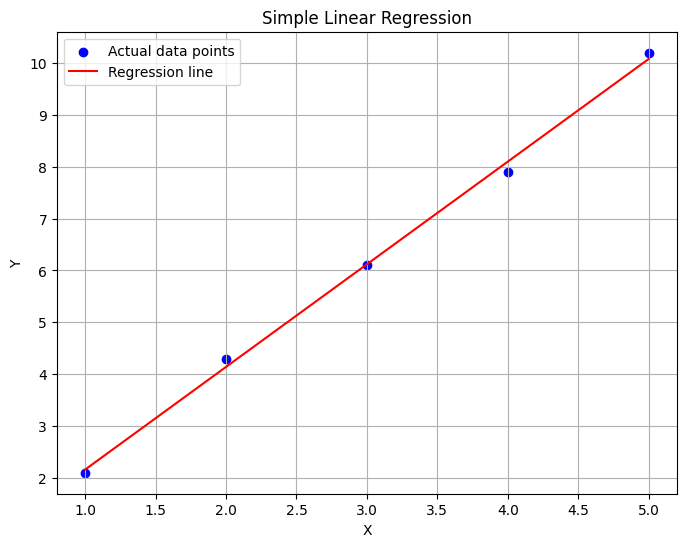

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Reshape X to a 2D array
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()

model.fit(X, Y)


Y_pred = model.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Actual data points')
plt.plot(X, Y_pred, color='red', label='Regression line')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

7. Fit a Multiple Linear Regression model on this sample data:

● Area = [1200, 1500, 1800, 2000]

● Rooms = [2, 3, 3, 4]

● Price = [250000, 300000, 320000, 370000]

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression


Area = np.array([1200, 1500, 1800, 2000])
Rooms = np.array([2, 3, 3, 4])
Price = np.array([250000, 300000, 320000, 370000])


X_multi = np.array([Area, Rooms]).T
Y_multi = Price


multi_model = LinearRegression()
multi_model.fit(X_multi, Y_multi)


print(f"Coefficients for Area and Rooms: {multi_model.coef_}")
print(f"Intercept: {multi_model.intercept_}")

Coefficients for Area and Rooms: [   63.15789474 34736.84210526]
Intercept: 103157.89473684214


8. Implement polynomial regression on the following data:

● X = [1, 2, 3, 4, 5]

● Y = [2.2, 4.8, 7.5, 11.2, 14.7]

Fit a 2nd-degree polynomial and plot the resulting curve.

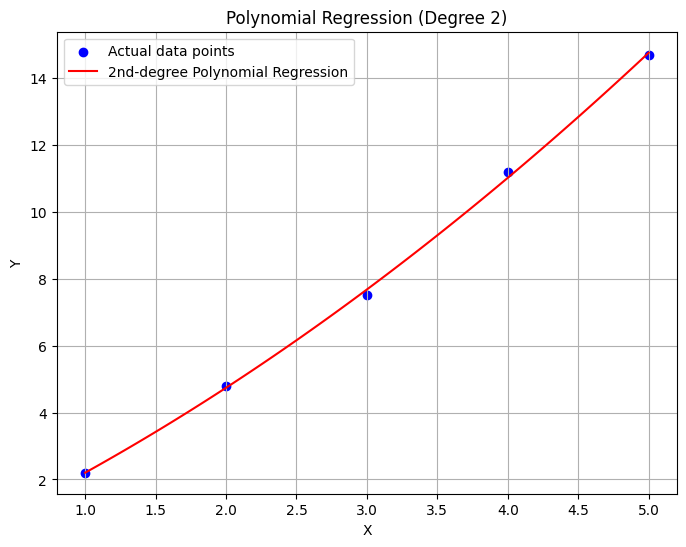

Polynomial Coefficients: [0.   1.94 0.2 ]
Intercept: 0.06000000000000938


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


X_poly = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y_poly = np.array([2.2, 4.8, 7.5, 11.2, 14.7])


poly_features = PolynomialFeatures(degree=2)
X_poly_transformed = poly_features.fit_transform(X_poly)


poly_model = LinearRegression()


poly_model.fit(X_poly_transformed, Y_poly)


X_plot = np.linspace(min(X_poly), max(X_poly), 100).reshape(-1, 1)
X_plot_transformed = poly_features.transform(X_plot)
Y_plot_pred = poly_model.predict(X_plot_transformed)


plt.figure(figsize=(8, 6))
plt.scatter(X_poly, Y_poly, color='blue', label='Actual data points')
plt.plot(X_plot, Y_plot_pred, color='red', label='2nd-degree Polynomial Regression')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()
print(f"Polynomial Coefficients: {poly_model.coef_}")
print(f"Intercept: {poly_model.intercept_}")

9. Create a residuals plot for a regression model trained on this data:

● X = [10, 20, 30, 40, 50]

● Y = [15, 35, 40, 50, 65]

 Assess heteroscedasticity by examining the spread of residuals.


In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)


Y = np.array([15, 35, 40, 50, 65])
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

print(f"X data: {X.flatten()}")
print(f"Y data: {Y}")
print(f"Predicted Y values: {Y_pred}")
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

X data: [10 20 30 40 50]
Y data: [15 35 40 50 65]
Predicted Y values: [18.  29.5 41.  52.5 64. ]
Model Coefficients: [1.15]
Model Intercept: 6.499999999999993


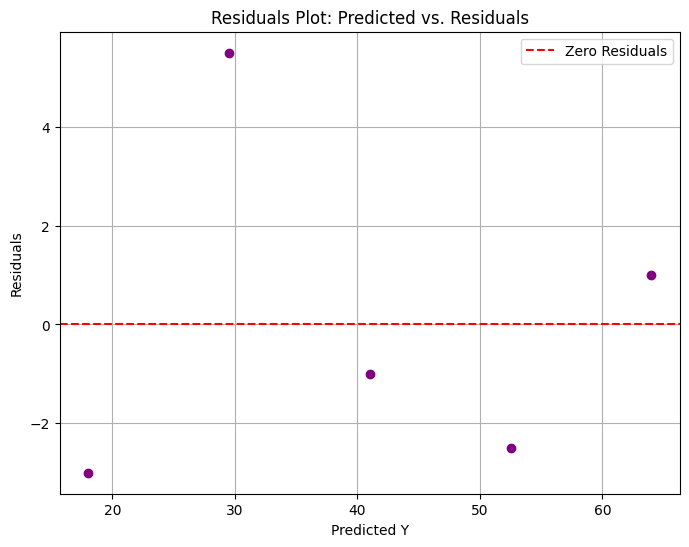

Residuals: [-3.   5.5 -1.  -2.5  1. ]


In [15]:
import matplotlib.pyplot as plt

residuals = Y - Y_pred

plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals')
plt.title('Residuals Plot: Predicted vs. Residuals')
plt.xlabel('Predicted Y')
plt.ylabel('Residuals')
plt.grid(True)
plt.legend()
plt.show()

print(f"Residuals: {residuals}")

10. Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.
     - As a data scientist, I would take the following steps to handle heteroscedasticity and multicollinearity and build a robust house-price prediction model:
      
       *Heteroscedasticity: Plot residuals vs predicted values.
       * Multicollinearity: Check correlation matrix and Calculate Variance Inflation Factor (VIF).
       
       * Handle Multicollinearity: Remove or combine highly correlated features and Apply Principal Component Analysis (PCA) if needed.
        
  * In conclusion, the final task is to Summarize the key steps taken to manage heteroscedasticity and multicollinearity, and confirm the model's enhanced robustness for house price prediction.
